In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
from keras import optimizers

savedir =''

json_file = open(savedir + '../yeastmodelmodel_nobias.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights(savedir + '../yeastmodelmodel_nobias.h5')
print("Loaded model from disk")




Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Loaded model from disk


In [2]:
weights = model.get_weights()[0]


   /-131567
  |
  |                           /-679936
  |                     /- /-|
  |               /- /-|      \-1051632
  |              |     |
  |              |      \-644966
  |              |
  |              |         /-272564
  |              |      /-|
  |              |   /-|   \-138119
  |              |  |  |
  |              |  |   \- /-871963
  |              |  |
  |              |  |   /- /-868595
  |              |  |  |
  |              |  |--|-- /-349161
  |              |  |  |
  |              |  |   \-696281
  |              |  |
  |              |  |   /- /-646529
  |              |  |  |
  |              |  |--|-- /-768704
  |              |--|  |
  |              |  |   \-768706
  |              |  |
  |              |  |-- /-370438
  |              |  |
  |              |  |-- /-645991
  |              |  |
  |              |  |-- /-477974
  |              |  |
  |              |  |-- /-760568
  |              |  |
  |              |  |-- /-485916
  |   

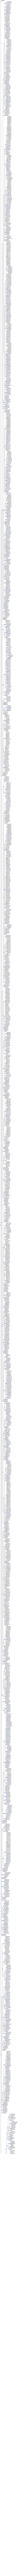

In [3]:
import dill as pickle
import ete3 

#mastertree = ete3.Tree( open( 'mastertree.nwk','r').read())
mastertree = pickle.loads( open('../mastertree.pkl','rb' ).read())
taxindex = pickle.loads( open( '../taxaIndex.pkl','rb').read())

print(mastertree)
mastertree.render(file_name = '%%inline')

(13119, 10)


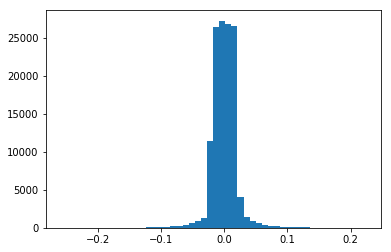

In [4]:

from matplotlib import pyplot as plt
%matplotlib inline
print(weights.shape)
plt.hist(weights.ravel(), bins = 50)
plt.show()



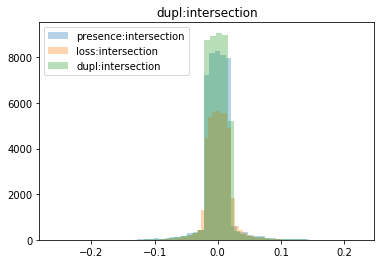

dict_keys(['presence', 'loss', 'dupl'])


In [5]:
events =['presence', 'loss', 'dupl']
weight_type={'intersection':weights}
frac = int(weights.shape[0]/3)
total ={}
plt.clf()
for i,event in enumerate(events):
    total[event]={}
    for w in weight_type:
        total[event][w]= weight_type[w][i*frac:(i+1)*frac].ravel()
        ax = plt.hist(total[event][w],bins=50 , label = event +':' +w , alpha = .33 )  
        plt.title( event +':' +w)

plt.legend()
plt.show()
print(total.keys())
        

In [7]:
taxaindex = { i:n.name for i,n in enumerate(mastertree.traverse())}
reverse_taxa = dict( zip(taxaindex.values(), taxaindex.keys()))

for n in mastertree.traverse():
    for etype in total:
        for vec in total[etype]:
            key = vec+etype 
            n.add_features(key= total[etype][vec][reverse_taxa[n.name]] )

for n in mastertree.traverse():
    n.add_features(degree=0 )
    n.add_features(descendants=0 )
    
for n in mastertree.traverse():
    descendants = 0
    
    for k in n.traverse():
        k.degree+=1
        descendants+=1
    n.descendants = descendants


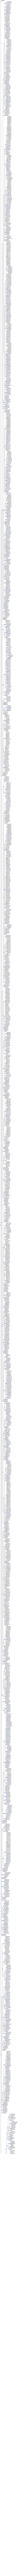

In [48]:
import PyQt5

from ete3 import Tree, TreeStyle

ts = TreeStyle()
ts.show_leaf_name = False
ts.mode = "c"


mastertree.render(file_name = '%%inline' , tree_style=ts)



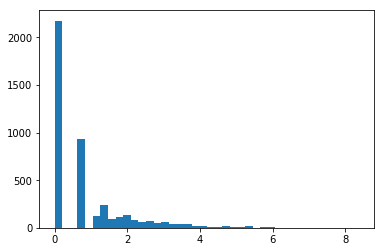

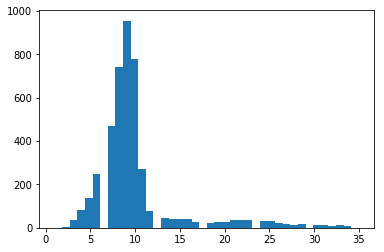

[4373    1 3085 ...    1    1    1]


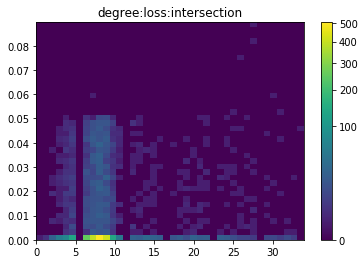

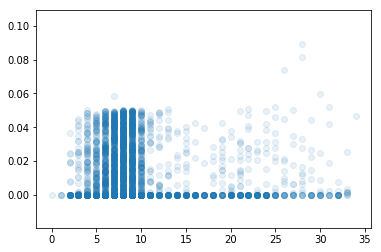

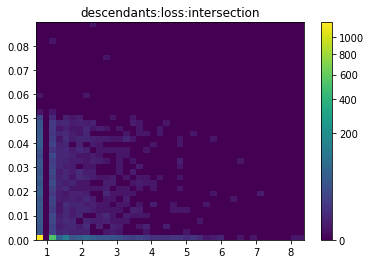

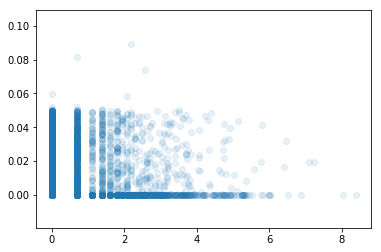

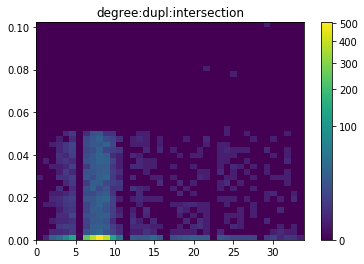

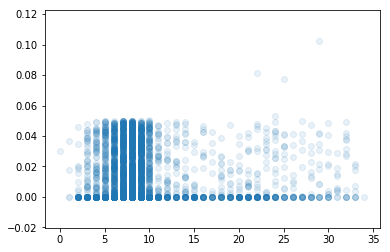

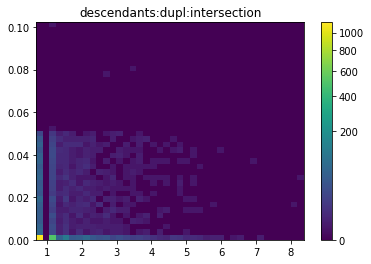

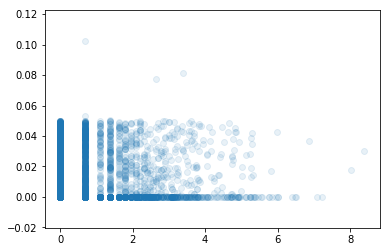

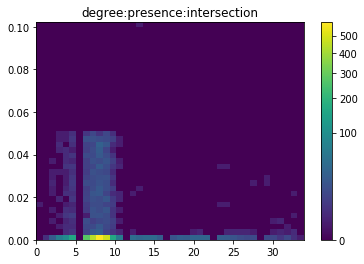

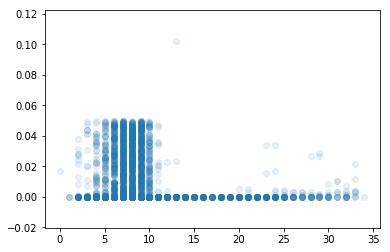

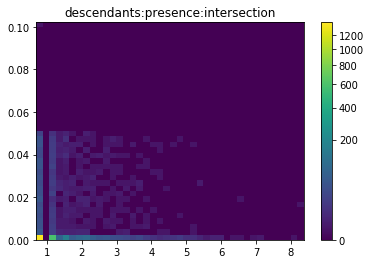

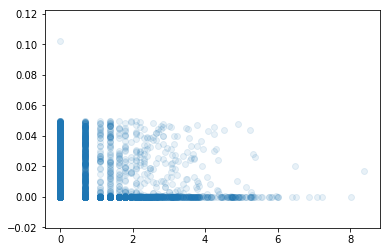

In [134]:
import numpy as np
import matplotlib.colors as mcolors

degree=np.asarray([ n.degree for n in mastertree.traverse()])
descendants=np.asarray([ n.descendants for n in mastertree.traverse()])

plt.hist(np.log(descendants),bins = 40)
plt.show()
plt.hist(degree,bins = 40)
plt.show()

print(descendants)

for key in total.keys():
    for key2 in total[key].keys():
        weightvec =total[key][key2]
        plt.hist2d(ancestors.flatten() , weightvec.flatten(), bins=[40,40] , norm=mcolors.PowerNorm(.4) )
        plt.title('degree:'+ key +':' +key2)
        plt.colorbar()
        plt.show()
        
        plt.scatter(ancestors, weightvec.flatten()  , alpha = .1 )
        plt.show()
        
        
        plt.hist2d(np.log(descendants+1) , weightvec.flatten() , bins=[40,40] , norm=mcolors.PowerNorm(.4))
        plt.title('descendants:'+ key +':' +key2)
        plt.colorbar()
        plt.show()   
        
        
        plt.scatter(np.log(descendants), weightvec.flatten()  , alpha = .1 )
        plt.show()